<a href="https://colab.research.google.com/github/ShivaShirsath/dl/blob/master/char.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
438/438 [==============================] - 2s 3ms/step - loss: 2.8101 - accuracy: 0.2415 - val_loss: 2.0944 - val_accuracy: 0.4462
Epoch 2/100
438/438 [==============================] - 2s 4ms/step - loss: 1.7569 - accuracy: 0.5373 - val_loss: 1.5566 - val_accuracy: 0.5815
Epoch 3/100
438/438 [==============================] - 2s 4ms/step - loss: 1.4497 - accuracy: 0.6072 - val_loss: 1.3860 - val_accuracy: 0.6182
Epoch 4/100
438/438 [==============================] - 1s 3ms/step - loss: 1.3160 - accuracy: 0.6434 - val_loss: 1.2678 - val_accuracy: 0.6497
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 1.2267 - accuracy: 0.6688 - val_loss: 1.1885 - val_accuracy: 0.6825
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 1.1545 - accuracy: 0.6867 - val_loss: 1.1378 - val_accuracy: 0.6963
Epoch 7/100
438/438 [==============================] - 2s 4ms/step - loss: 1.0860 - accuracy: 0.7045 - val_loss: 1.0646 - val_accuracy: 0.7082

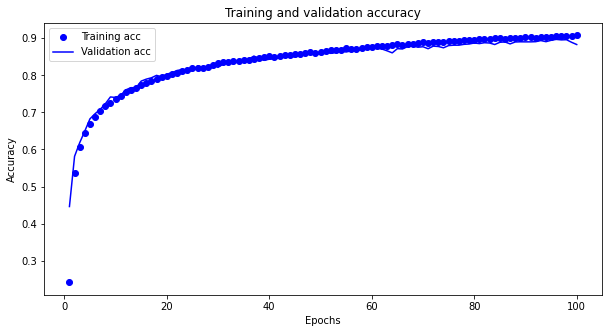

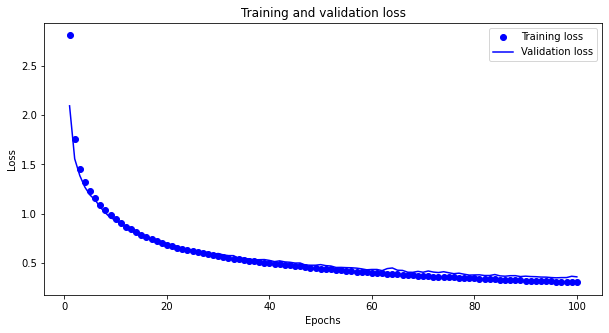

In [1]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
df = pd.read_csv(url, header=None)

# Preprocess data
X = df.iloc[:, 1:]
X = X / 15.0
y = df.iloc[:, 0]
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(26, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Visualize results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

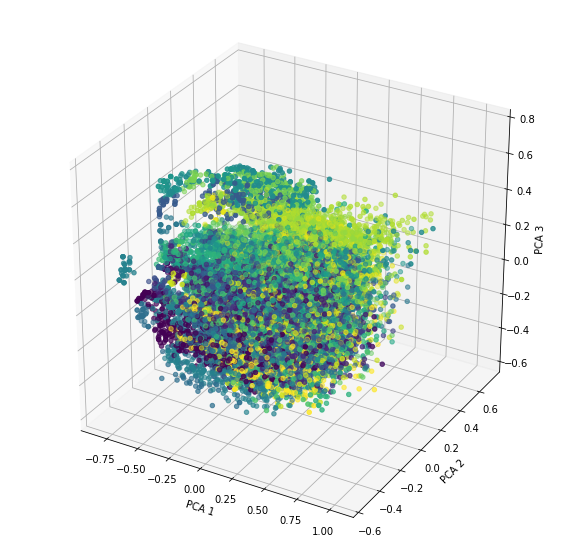

In [2]:

from sklearn.decomposition import PCA

# Apply PCA to reduce input data to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create 3D scatter plot of reduced data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=np.argmax(y.values, axis=1), cmap=plt.cm.get_cmap('viridis', 26))
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

188/188 [==============================] - 0s 1ms/step
Test accuracy: 0.883


<ipython-input-3-dad4a5bee20d>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat = np.zeros((26, 26), dtype=np.int)


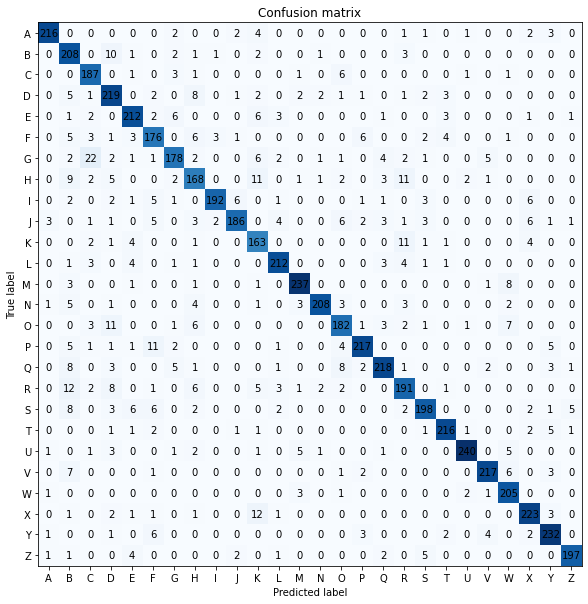

In [3]:

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)

# Calculate prediction accuracy
test_acc = np.mean(y_pred == y_true)
print("Test accuracy:", test_acc)

# Create a confusion matrix
conf_mat = np.zeros((26, 26), dtype=np.int)
for i in range(len(y_true)):
    conf_mat[y_true[i], y_pred[i]] += 1

# Visualize prediction accuracy using a confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(conf_mat, cmap='Blues')
plt.xticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.yticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
for i in range(26):
    for j in range(26):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white' if conf_mat[i, j] > len(y_true)*0.05 else 'black')
plt.show()